# Machine Learning - Neural Net

Nesse projeto de Machine Learning, estaremos usando uma rede neural para criarmos um modelo de regressão que irá prever a quantidade de bicicletas alugadas com base na nossa base de dados que contém dados diários de aluguel de bicicletas durante o período de 2 anos. 
Na nossa base de dados temos dados de temperatura, umidade do ar, velocidade do vento como variáveis quantitativas.
Como variáveis qualitativas, temos a época do ano, mês, dia da semana, feriados, dias úteis e a situação do clima.
Iremos então realizar todos os passos clássicos referentes a criação de modelo de Machine Learning a seguir.

- Referência da base de dados: 
    - This Hadi Fanaee-T
    - Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto INESC Porto, Campus da FEUP Rua Dr. Roberto Frias, 378 4200 - 465 Porto, Portugal


# Etapa 1: Importação das bibliotecas

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 2: Importação da base de dados

Iremos importar nossa base de dados e em seguidas analisarmos algumas estatíscas descritivas da nossa base.

In [2]:
bike = pd.read_csv('../input/bikecsv/bike-sharing-daily.csv')

In [3]:
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [4]:
display(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


None

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Etapa 3: Limpeza da base de dados

Vamos verificar se a nossa base de dados contém valores nulos e em seguida iremos realizar alguns processos de limpeza de dados em nossa base.

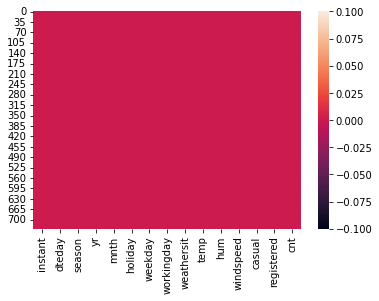

In [6]:
sns.heatmap(bike.isnull());

In [7]:
bike = bike.drop(labels=['instant'], axis = 1)

In [8]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [9]:
bike = bike.drop(labels=['casual', 'registered'], axis = 1)

In [10]:
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [11]:
bike.dteday = pd.to_datetime(bike.dteday, format = '%m/%d/%Y')

In [12]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [13]:
bike.index = pd.DatetimeIndex(bike.dteday)

In [14]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [15]:
bike = bike.drop(labels=['dteday'], axis=1)

In [16]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


# Etapa 4: Visualização da base de dados

Agora, vejamos alguns gráficos que facilitarão o entendimento das variáveis da base de dados e das correlações que elas possuem entre si.

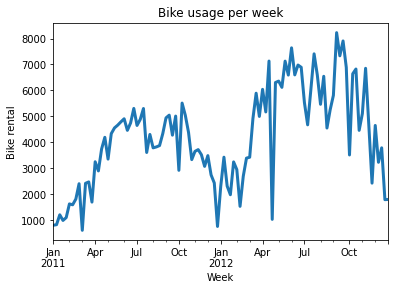

In [17]:
bike['cnt'].asfreq('W').plot(linewidth = 3)
plt.title('Bike usage per week')
plt.xlabel('Week')
plt.ylabel('Bike rental');

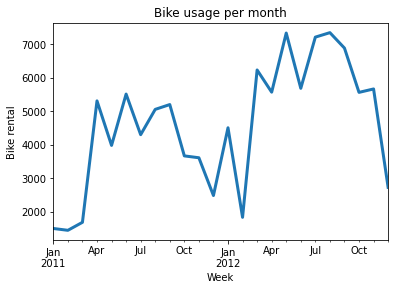

In [18]:
bike['cnt'].asfreq('M').plot(linewidth = 3)
plt.title('Bike usage per month')
plt.xlabel('Week')
plt.ylabel('Bike rental');

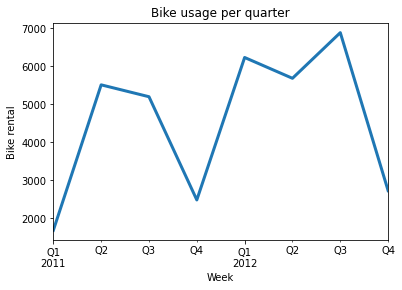

In [19]:
bike['cnt'].asfreq('Q').plot(linewidth = 3)
plt.title('Bike usage per quarter')
plt.xlabel('Week')
plt.ylabel('Bike rental');

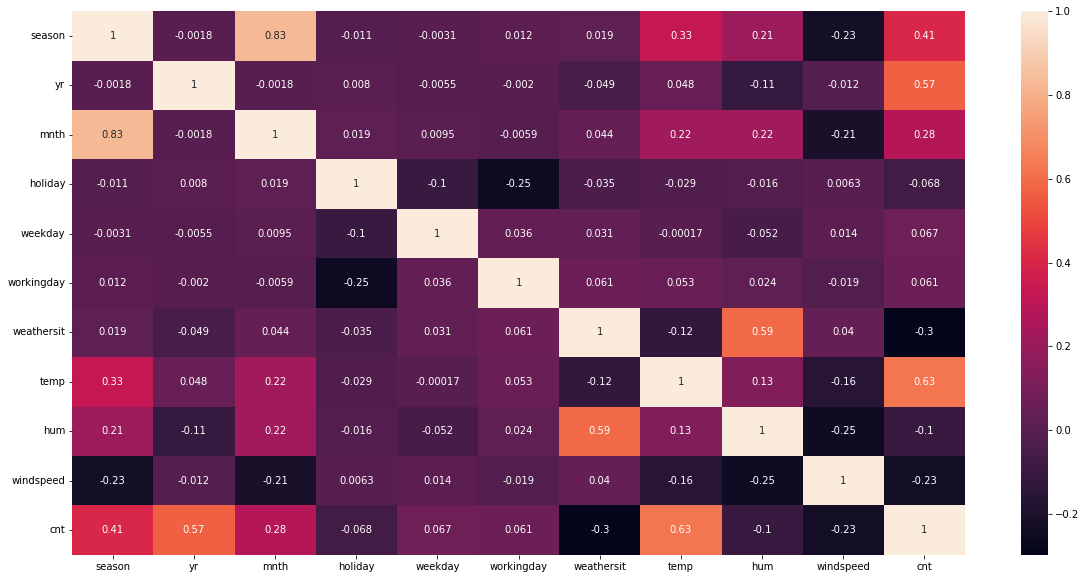

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(bike.corr(), annot = True);


In [21]:
X_numerical = bike[['temp', 'hum', 'windspeed', 'cnt']]

In [22]:
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


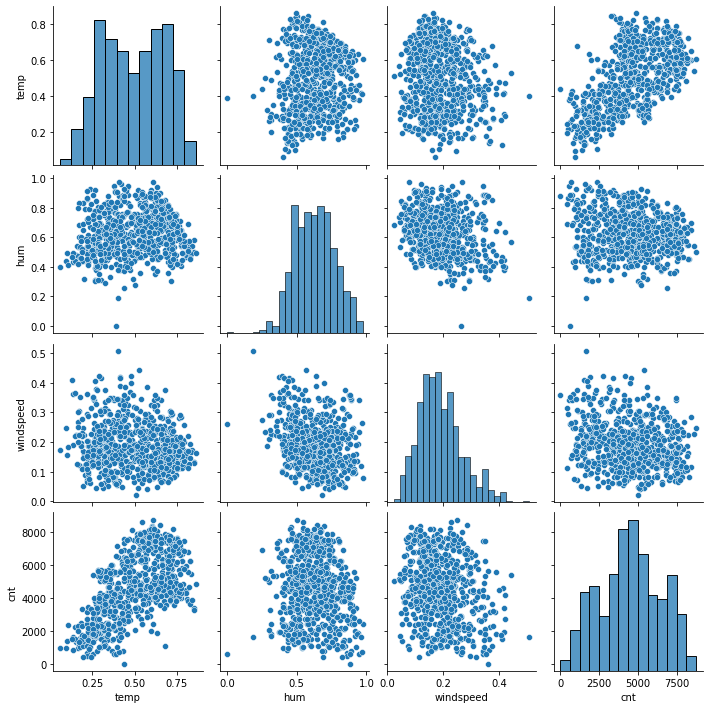

In [23]:
sns.pairplot(X_numerical)

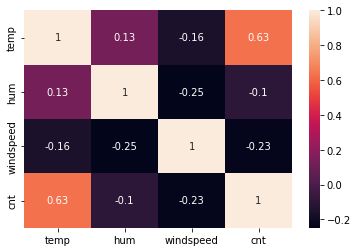

In [24]:
sns.heatmap(X_numerical.corr(), annot = True);

# Etapa 5: Tratamento das bases de dados

In [25]:
X_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

Iremos realizar um procedimento de "Encode" para que o nosso modelo de regressão linear usando uma rede neural possa conseguir identificar essas variáveis qualitativas como dia da semana, mês e feriado. Basimente a função "OneHotEnconder" transformar essas variáveis em columas em que 1 representa positivo e 0 representa negativo ou ausente.

In [26]:
X_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


In [27]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [28]:
display(X_cat)

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [29]:
display(X_cat.shape)

(731, 32)

In [30]:
X_cat = pd.DataFrame(X_cat)

In [31]:
X_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [32]:
X_numerical.head()

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600


In [33]:
X_numerical = X_numerical.reset_index()

In [34]:
X_numerical.head()

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600


In [35]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [36]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600


In [37]:
X_all = X_all.drop(labels=['dteday'], axis = 1)

In [38]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


In [39]:
X = X_all.iloc[:, :-1].values

In [40]:
y = X_all.iloc[:, -1:].values

In [41]:
display(X.shape)

(731, 35)

In [42]:
display(y.shape)

(731, 1)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [45]:
display(X_train.shape)

(584, 35)

In [46]:
display(X_test.shape)

(147, 35)

# Etapa 6: Construção e treinamento do modelo

In [47]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100, activation='relu', input_shape=(35,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

2022-03-30 18:06:06.918223: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [48]:
display(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


None

In [49]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [50]:
epochs_hist = model.fit(X_train, y_train, epochs = 25, batch_size = 50, validation_split=0.2)

2022-03-30 18:06:07.621609: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
10/10 [==============================] - 1s 23ms/step - loss: 0.2571 - val_loss: 0.1163
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0758 - val_loss: 0.0626
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0377 - val_loss: 0.0245
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0214 - val_loss: 0.0176
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0135 - val_loss: 0.0160
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.0103 - val_loss: 0.0144
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.0137
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0133
Epoch 9/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0068 - val_loss: 0.0139
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.0136
Epoch 11/25
10/10 

# Etapa 7: Avaliação do modelo 

In [51]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

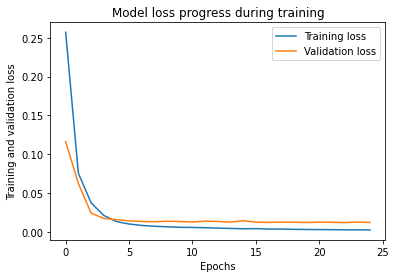

In [52]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss']);

In [53]:
y_predict = model.predict(X_test)

In [54]:
display(y_predict)

array([[0.93967617],
       [0.81774116],
       [0.57822037],
       [0.6879496 ],
       [0.73556244],
       [0.51957494],
       [0.36004114],
       [0.5112466 ],
       [0.5436085 ],
       [0.81316096],
       [0.13590027],
       [0.17163953],
       [0.26040298],
       [0.3281946 ],
       [0.7856815 ],
       [0.53022593],
       [0.26193693],
       [0.54457897],
       [0.6212983 ],
       [0.42130426],
       [0.601695  ],
       [0.81947476],
       [0.76701933],
       [0.5438758 ],
       [0.46682328],
       [0.20245688],
       [0.61672735],
       [0.39299437],
       [0.22835945],
       [0.35884356],
       [0.5159697 ],
       [0.29691204],
       [0.58706915],
       [0.822102  ],
       [0.76985824],
       [0.27966022],
       [0.47666675],
       [0.167686  ],
       [0.1909291 ],
       [0.59579587],
       [0.36685532],
       [0.8307913 ],
       [0.50265324],
       [0.42568994],
       [0.7420723 ],
       [0.61152416],
       [0.81631863],
       [0.519

Text(0, 0.5, 'True values')

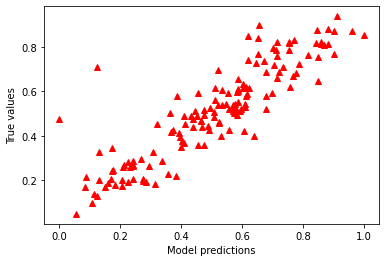

In [55]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model predictions')
plt.ylabel('True values')

In [56]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)
comp = pd.DataFrame(y_test_orig)
comp.columns = ['Y_test']
comp['Prediction'] = pd.DataFrame(y_predict_orig)
comp['Diference Between Y_test and Prediction'] =   comp['Y_test'] - comp['Prediction']
display(comp)
comp.describe()

,Y_test,Prediction,Diference Between Y_test and Prediction
0,7965.0,8189.665039,-224.665039
1,7350.0,7129.806152,220.193848
2,5936.0,5047.891113,888.108887
3,6290.0,6001.657715,288.342285
4,5870.0,6415.508789,-545.508789
...,...,...,...
142,6398.0,6201.896484,196.103516
143,3214.0,3625.384521,-411.384521
144,4881.0,3719.622314,1161.377686
145,2947.0,2523.140137,423.859863


,Y_test,Prediction,Diference Between Y_test and Prediction
count,147.000000,147.000000,147.000000
mean,4418.653061,4466.139160,-47.487134
std,1969.576471,1868.226074,913.889427
min,22.000000,427.783325,-5091.797852
25%,3032.000000,3096.000122,-423.753906
50%,4576.000000,4506.808594,-12.627930
75%,5705.500000,5915.736572,485.498535
max,8714.000000,8189.665039,2098.449219


Text(0, 0.5, 'True values')

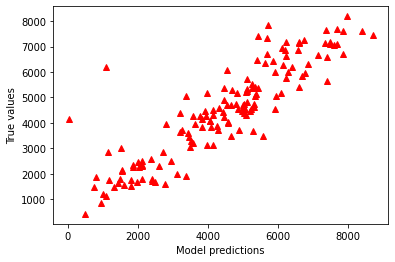

In [57]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model predictions')
plt.ylabel('True values')

In [58]:
k = X_test.shape[1]
display(k)

35

In [59]:
n = len(X_test)
display(n)

147

In [60]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [61]:
mae = mean_absolute_error(y_test_orig, y_predict_orig)
mse = mean_squared_error(y_test_orig, y_predict_orig)
rmse = sqrt(mse)
r2 = r2_score(y_test_orig, y_predict_orig)

In [62]:
display(f"MAE: {mae}", f"\nMSE: {mse}", f"\nRMSE: {rmse}", f"\nR2: {r2}")

'MAE: 627.5797920486553'

'\nMSE: 831767.3219941356'

'\nRMSE: 912.0127860913659'

'\nR2: 0.7841159095794792'

Podemos observar que o coeficiente de determinação de nosso modelo foi de 71,69%, isso significa que o modelo explica 71,69% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas no modelo linear. Assim, vemos como uma rede neural pode ser extremamente útil para realizarmos previsões com base em variáveis que estão correlacionadas entre si.